In [7]:
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

sim = rebound.Simulation()
sim.integrator = "whfast"
sim.units = ('AU', 'days', 'Msun')

# We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
labels = ["Sun","Jupiter","Saturn"]
sim.add(labels)
Ntest = 10000
a_init = np.linspace(2,3.8,Ntest)
for k in a_init:
    sim.add(a=k, f=2*np.pi*np.random.rand())
sim.N_active = len(labels)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')


In [8]:
t_max = 1000*365
sim.dt = 28
Nout=2
Nbodies=Ntest+sim.N_active
Times = np.linspace(0,t_max,Nout)

pos = np.zeros(shape=(Nbodies,Nout,3))
vit = np.zeros(shape=(Nbodies,Nout,3))
ecc = np.zeros(shape=(Nbodies,Nout))
semax = np.zeros(shape=(Nbodies,Nout))
ps = sim.particles

for i,time in enumerate(Times):
    sim.integrate(time)
    os = sim.orbits(primary=ps[0])
    for k, body in enumerate(ps):
        pos[k,i,0] = body.x
        pos[k,i,1] = body.y
        pos[k,i,2] = body.z

        vit[k,i,0] = body.vx
        vit[k,i,1] = body.vy
        vit[k,i,2] = body.vz
        
        if k != 0:
            ecc[k,i] = body.e
            semax[k,i] = body.a

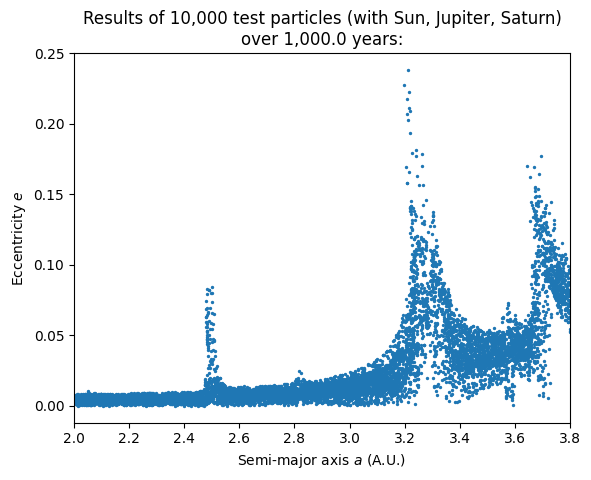

In [12]:
plt.scatter(semax[:,-1],ecc[:,-1], s=2)
plt.title(f"Results of {Ntest:,} test particles (with Sun, Jupiter, Saturn)\nover {t_max/365:,} years:")
plt.xlabel(r"Semi-major axis $a$ (A.U.)")
plt.ylabel(r"Eccentricity $e$")
plt.xlim(2,3.8)
plt.savefig("AvecSaturn.png")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


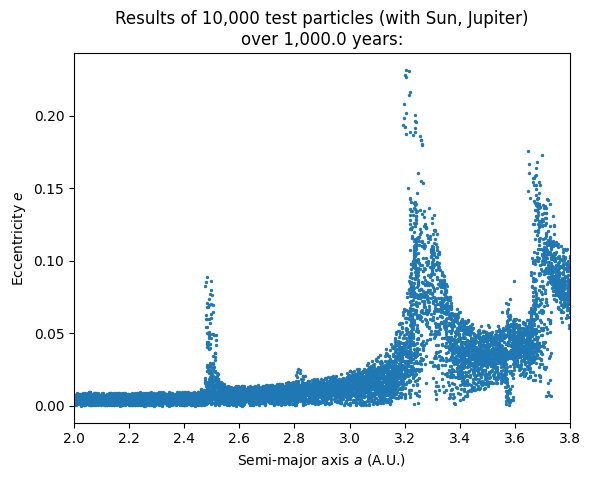

In [13]:
sim = rebound.Simulation()
sim.integrator = "whfast"
sim.units = ('AU', 'days', 'Msun')

# We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
labels = ["Sun","Jupiter"]
sim.add(labels)
Ntest = 10000
a_init = np.linspace(2,3.8,Ntest)
for k in a_init:
    sim.add(a=k, f=2*np.pi*np.random.rand())
sim.N_active = len(labels)

t_max = 1000*365
sim.dt = 28
Nout=2
Nbodies=Ntest+sim.N_active
Times = np.linspace(0,t_max,Nout)

pos = np.zeros(shape=(Nbodies,Nout,3))
vit = np.zeros(shape=(Nbodies,Nout,3))
ecc = np.zeros(shape=(Nbodies,Nout))
semax = np.zeros(shape=(Nbodies,Nout))
ps = sim.particles

for i,time in enumerate(Times):
    sim.integrate(time)
    os = sim.orbits(primary=ps[0])
    for k, body in enumerate(ps):
        pos[k,i,0] = body.x
        pos[k,i,1] = body.y
        pos[k,i,2] = body.z

        vit[k,i,0] = body.vx
        vit[k,i,1] = body.vy
        vit[k,i,2] = body.vz
        
        if k != 0:
            ecc[k,i] = body.e
            semax[k,i] = body.a

plt.scatter(semax[:,-1],ecc[:,-1], s=2)
plt.title(f"Results of {Ntest:,} test particles (with Sun, Jupiter)\nover {t_max/365:,} years:")
plt.xlabel(r"Semi-major axis $a$ (A.U.)")
plt.ylabel(r"Eccentricity $e$")
plt.xlim(2,3.8)
plt.savefig("SansSaturn.png")

In [14]:
sim = rebound.Simulation()
sim.integrator = "whfast"
sim.units = ('AU', 'days', 'Msun')

# We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
labels = ["Sun","Jupiter"]
sim.add(labels)
Ntest = 10000
a_init = np.linspace(2,3.8,Ntest)
for k in a_init:
    sim.add(a=k, f=2*np.pi*np.random.rand())
sim.N_active = len(labels)

t_max = 1000*365
sim.dt = 28
Nout=2
Nbodies=Ntest+sim.N_active
Times = np.linspace(0,t_max,Nout)

def simulation(par):
    a, e = par # unpack parameters
    sim.ri_whfast.safe_mode = 0
    sim.add(m=0, a=a, e=e, f=np.random.rand()*2*np.pi)
    sim.move_to_com()
    
    sim.init_megno()
    sim.exit_max_distance = 20.
    try:
        sim.integrate(t_max, exact_finish_time=0) # integrate for 500 years, integrating to the nearest
        #timestep for each output to keep the timestep constant and preserve WHFast's symplectic nature
        megno = sim.megno() 
        return megno
    except rebound.Escape:
        return 10. # At least one particle got ejected, returning large MEGNO.

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


In [ ]:
from multiprocess import Pool

In [ ]:
def MLE(pos1, vel1, pos2, vel2, dt):
    N_step = len(pos1)
    dpos = pos1 - pos2
    dvel = vel1 - vel2
    L = 0
    
    for i in range(1,N_step):
        s_i = np.linalg.norm(dpos[i] - dvel[i])/np.linalg.norm(dpos[i-1] - dvel[i-1])
        L += np.log(s_i)

    return L/(N_step*dt)

def FLI(pos1, vel1, pos2, vel2):
    dpos = pos1 - pos2
    dvel = vel1 - vel2
    return np.max(np.log(np.linalg.norm(dpos - dvel, axis=1)))

def MEGNO(pos1, vel1, pos2, vel2, t):
    dpos = pos1 - pos2
    dvel = vel1 - vel2
    delta = np.linalg.norm(dpos - dvel, axis=1)
    delta_dot = np.gradient(delta, t, axis = 0)
    
    integral = 0
    for i in range(len(t)-1):
        integral += delta_dot[i]/delta[i]*t[i]*(t[i+1]-t[i])

    return 2/t[-1]*integral